### 델타헤징

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [ ]:
r = 0.00
sig = 0.2
T = 100/365
K = 100

M = 1000
N = 100

dt = T / N
rdt = r * dt
sigmdt = sig * np.sqrt(dt)

In [ ]:
np.random.seed(100)
S0 = 100
S = np.empty([M, N+1])
rv = np.random.normal(r*dt, sigmdt, [M,N])

In [ ]:
def c_delta(r, sig, T, d1, d2, K,S):
  return np.exp(-(r+sig**2/6)*(T/2))*norm.cdf(d1) + 1/(sig*np.sqrt(2*np.pi*T/3)) * (np.exp(-(r*T/2 + T* sig **2/12 + d1**2/2))-K/S*np.exp(-r*T-d2**2/2))

In [ ]:
def bscall(S, K, T, r, sig):
    d1 = (np.log(S/K) + (T/2)*(r+(sig**2)/6)) / (sig*np.sqrt(T/3))
    d2 = (np.log(S/K) + (T/2)*(r-(sig**2)/2)) / (sig*np.sqrt(T/3))
    return S*np.exp(-(r*(sig**2)/6)* (T/2)) * norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    
def bsput(S, K, T, r, sig):
    d1 = (np.log(S/K) + T/2*(r+(sig**2)/6)) / (sig*np.sqrt(T/3))
    d2 = (np.log(S/K) + T/2*(r-(sig**2)/2)) / (sig*np.sqrt(T/3))
    return K*np.exp(-r*T)*norm.cdf(-d2)-S*np.exp(-(r*(sig**2)/6)* (T/2)) * norm.cdf(-d1)

In [ ]:
bscall(S0, K,T,r,sig)

2.4105566452813036

In [ ]:
for i in range(M):
  S[i,0] = S0
  for j in range(N):
    S[i,j+1] = S[i,j] * (1+rv[i,j])

In [ ]:
m=40
K=100
hedge = 0
cost = 0

for j in range(N):
    S_ = np.prod(S[m,:j+1]) ** (1/(j+1)) 
    d1 = (np.log(S[m,j]/K) + ((T-j*dt)/2)*(r+(sig**2)/6)) / (sig*np.sqrt((T-j*dt)/3))
    d2 = (np.log(S[m,j]/K) + ((T-j*dt)/2)*(r-(sig**2)/2)) / (sig*np.sqrt((T-j*dt)/3))
    delta = c_delta(r, sig, (T-j*dt), d1, d2, K,S[m,j])
    cost = cost + (hedge - delta) * S[m,j]
    print(S_, delta, cost)

    hedge = delta

100.0 0.5055658525341266 -50.556585253412656
99.01268755358454 0.3760585859395885 -37.86032444784762
98.99102744184273 0.4353241796992891 -43.72451990971322
98.89773473491562 0.41302185994300067 -41.52510117997376
98.74295578593845 0.37999909942248256 -38.28470124293835
98.80451529016104 0.44531323310871446 -44.75817372265466
99.35043653954291 0.6793890725673692 -68.79539689999982
99.83094094946901 0.7133529441504975 -72.30251223655364
100.3068523363788 0.7647141482667753 -77.65418193597205
100.78625362065375 0.8138022794261641 -82.81851327699768
101.25638768446916 0.8509954765082751 -86.76396941043343
101.72139152366502 0.8837267173173825 -90.26554294744541
102.16687996067695 0.9053810385547209 -92.59700721999836
102.71806749227838 0.957472364425532 -98.33538944516214
103.34224831195847 0.9819618962432184 -101.09020995809043
104.04146374582106 0.9936880804974605 -102.44007821388442
104.53945632848028 0.9851445182692077 -101.47602776503992
104.98132114230418 0.9853073608209194 -101.494

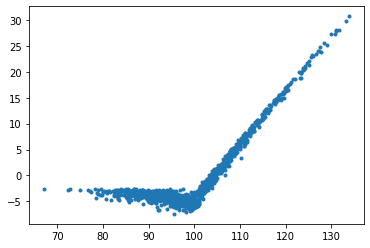

In [ ]:
a = []
K = 100
for i in range(M):
  cost = 0
  hedge = 0
  for j in range(N):
    S_ = np.prod(S[i,:j+1]) ** (1/(j+1))
    d1 = (np.log(S[i,j]/K) + ((T-j*dt)/2)*(r+(sig**2)/6)) / (sig*np.sqrt((T-j*dt)/3))
    d2 = (np.log(S[i,j]/K) + ((T-j*dt)/2)*(r-(sig**2)/2)) / (sig*np.sqrt((T-j*dt)/3))
    delta = c_delta(r, sig, (T-j*dt), d1, d2, K,S[i,j])
    cost = cost + (hedge - delta) * S[i,j]
    hedge = delta
  cost = cost + hedge * S[i,N]

  a.append(cost)

plt.plot(S[:,-1], a, marker='.', linestyle='none')
plt.show()

$(\Delta_0-0)S_0 + (\Delta_1-\Delta_0)S_1 + (\Delta_2- \Delta_1)S_2 + \cdots + (\Delta_{T} - \Delta_{T-1})S_T$

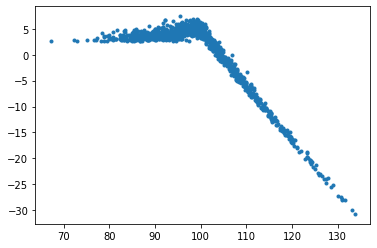

In [ ]:
a = []
K = 100
for i in range(M):
  cost = 0
  hedge = 0
  for j in range(N):
    S_ = np.prod(S[i,:j+1]) ** (1/(j+1))
    d1 = (np.log(S[i,j]/K) + ((T-j*dt)/2)*(r+(sig**2)/6)) / (sig*np.sqrt((T-j*dt)/3))
    d2 = (np.log(S[i,j]/K) + ((T-j*dt)/2)*(r-(sig**2)/2)) / (sig*np.sqrt((T-j*dt)/3))
    delta = c_delta(r, sig, (T-j*dt), d1, d2, K,S[i,j])
    cost = cost + (delta-hedge) *S[i,j]
    hedge = delta

  cost = cost-hedge * S[i,N]
  a.append(cost)
plt.plot(S[:,-1], a, marker='.', linestyle='none')
plt.show()

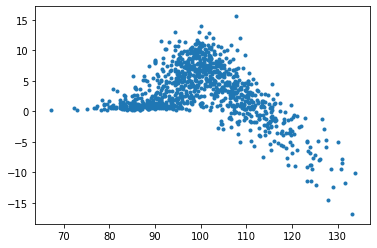

In [ ]:
a = []
K = 100
for i in range(M):
  cost = 0
  hedge = 0
  for j in range(N):
    S_ = np.prod(S[i,:j+1]) ** (1/(j+1))
    d1 = (np.log(S[i,j]/K) + ((T-j*dt)/2)*(r+(sig**2)/6)) / (sig*np.sqrt((T-j*dt)/3))
    d2 = (np.log(S[i,j]/K) + ((T-j*dt)/2)*(r-(sig**2)/2)) / (sig*np.sqrt((T-j*dt)/3))
    delta = c_delta(r, sig, (T-j*dt), d1, d2, K,S[i,j])
    cost = cost + (delta-hedge) *S[i,j]
    hedge = delta

  #cost = cost-hedge * S[i,N]
  geom_mean = np.prod(S[i]) ** (1/N)
  cost = cost-hedge*S[i,N] + np.maximum(geom_mean-K,0) - 2.4105566452813036
  a.append(cost)

plt.plot(S[:,-1], a, marker='.', linestyle='none')
plt.show()

$\Delta_0 (S_0-S_1) + \Delta_1 (S_1-S_2) + \Delta_2 (S_2-S_3) + \cdots + \Delta_{T-1} (S_{T-1}-S_T) + \Delta_T S_T$



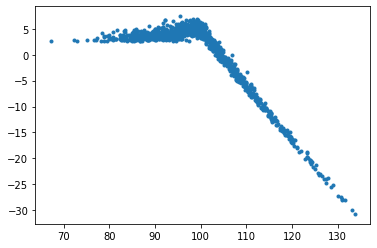

In [ ]:
a = []
K = 100
for i in range(M):
  cost = 0
  price = S[i,0]
  for j in range(N):
    S_ = np.prod(S[i,:j+1]) ** (1/(j+1))
    d1 = (np.log(S[i,j]/K) + ((T-j*dt)/2)*(r+(sig**2)/6)) / (sig*np.sqrt((T-j*dt)/3))
    d2 = (np.log(S[i,j]/K) + ((T-j*dt)/2)*(r-(sig**2)/2)) / (sig*np.sqrt((T-j*dt)/3))
    delta = c_delta(r, sig, (T-j*dt), d1, d2, K,S[i,j])

    cost = cost + delta * (price -S[i,j+1])
    price = S[i,j+1]

  a.append(cost)

plt.plot(S[:,-1], a, marker='.', linestyle='none')
plt.show()

### 딥헤징

#### 유닛 수 바꾸기 1

In [ ]:
import tensorflow as tf

In [ ]:
my_input = []
premium = tf.keras.layers.Input(shape=(1,), name="premium")
hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
price = tf.keras.layers.Input(shape=(1,), name="price")

my_input = my_input + [premium] + [hedge_cost] + [price]

for j in range(N):
    delta = tf.keras.layers.Dense(20, activation='tanh')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(20, activation='relu')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(20, activation='tanh')(delta)
    delta = tf.keras.layers.Dense(1)(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j+1))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="stock_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price_cumprod = tf.keras.layers.Multiply(name='price_cumprod'+str(j))([price, new_price])
    price = new_price
geom_mean = tf.keras.layers.Lambda(lambda x: tf.math.pow(x, 1/N, name='geom_mean'))(price_cumprod)
payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K,0), name='payoff')(geom_mean)
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

In [ ]:
premium = bscall(S0,K,T,r,sig) * np.ones([M,1])
cost = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [premium]+[cost]+[SS]
y = np.zeros([M,1])

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(x,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 73s 57ms/step - loss: 21.4487
Epoch 2/100
32/32 [==============================] - 2s 58ms/step - loss: 9.0388
Epoch 3/100
32/32 [==============================] - 2s 57ms/step - loss: 6.5763
Epoch 4/100
32/32 [==============================] - 2s 56ms/step - loss: 5.8025
Epoch 5/100
32/32 [==============================] - 2s 58ms/step - loss: 5.5562
Epoch 6/100
32/32 [==============================] - 2s 55ms/step - loss: 5.5493
Epoch 7/100
32/32 [==============================] - 2s 56ms/step - loss: 5.3431
Epoch 8/100
32/32 [==============================] - 2s 56ms/step - loss: 5.5188
Epoch 9/100
32/32 [==============================] - 2s 55ms/step - loss: 5.3065
Epoch 10/100
32/32 [==============================] - 2s 57ms/step - loss: 5.3213
Epoch 11/100
32/32 [==============================] - 2s 57ms/step - loss: 5.5090
Epoch 12/100
32/32 [==============================] - 2s 56ms/step - loss: 5.2629
Epoch 13/100
32/32 [===

(array([  1.,   1.,   0.,   1.,   6.,   6.,  12.,  22.,  20.,  32.,  35.,
         57.,  75.,  83.,  80.,  82., 100.,  73.,  74.,  61.,  60.,  40.,
         31.,  17.,  13.,  10.,   4.,   1.,   2.,   1.]),
 array([-15.380258  , -14.521872  , -13.663485  , -12.805098  ,
        -11.946712  , -11.0883255 , -10.2299385 ,  -9.3715515 ,
         -8.513165  ,  -7.654779  ,  -6.7963924 ,  -5.938006  ,
         -5.0796194 ,  -4.221233  ,  -3.3628464 ,  -2.5044599 ,
         -1.6460733 ,  -0.7876868 ,   0.07069969,   0.9290862 ,
          1.7874727 ,   2.6458592 ,   3.5042458 ,   4.3626323 ,
          5.221019  ,   6.0794053 ,   6.937792  ,   7.7961783 ,
          8.654565  ,   9.512951  ,  10.371338  ], dtype=float32),
 <a list of 30 Patch objects>)

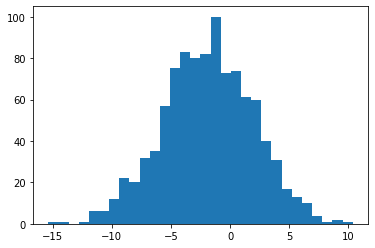

In [ ]:
plt.hist(model.predict(x), bins=30)

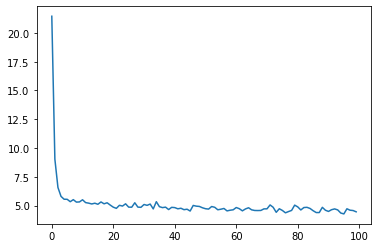

In [ ]:
plt.plot(history.history['loss'])

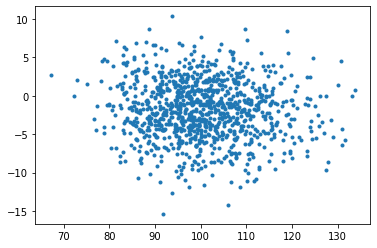

In [ ]:
plt.plot(S[:,-1], model.predict(x),marker='.', linestyle='none')
plt.show()

#### 유닛수 바꾸기 2

In [ ]:
my_input = []
premium = tf.keras.layers.Input(shape=(1,), name="premium")
hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
price = tf.keras.layers.Input(shape=(1,), name="price")

my_input = my_input + [premium] + [hedge_cost] + [price]

for j in range(N):
    delta = tf.keras.layers.Dense(32, activation='tanh')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(32, activation='relu')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(32, activation='tanh')(delta)
    delta = tf.keras.layers.Dense(1)(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j+1))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="stock_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price_cumprod = tf.keras.layers.Multiply(name='price_cumprod'+str(j))([price, new_price])
    price = new_price
geom_mean = tf.keras.layers.Lambda(lambda x: tf.math.pow(x, 1/N, name='geom_mean'))(price_cumprod)
payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K,0), name='payoff')(geom_mean)
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

In [ ]:
premium = bscall(S0,K,T,r,sig) * np.ones([M,1])
cost = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [premium]+[cost]+[SS]
y = np.zeros([M,1])

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(x,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 72s 72ms/step - loss: 22.1748
Epoch 2/100
32/32 [==============================] - 2s 70ms/step - loss: 10.1578
Epoch 3/100
32/32 [==============================] - 2s 71ms/step - loss: 8.0469
Epoch 4/100
32/32 [==============================] - 2s 69ms/step - loss: 7.5059
Epoch 5/100
32/32 [==============================] - 2s 69ms/step - loss: 7.4194
Epoch 6/100
32/32 [==============================] - 2s 68ms/step - loss: 7.6524
Epoch 7/100
32/32 [==============================] - 2s 69ms/step - loss: 7.4739
Epoch 8/100
32/32 [==============================] - 2s 69ms/step - loss: 7.6752
Epoch 9/100
32/32 [==============================] - 2s 69ms/step - loss: 6.7208
Epoch 10/100
32/32 [==============================] - 2s 68ms/step - loss: 6.9123
Epoch 11/100
32/32 [==============================] - 2s 69ms/step - loss: 6.5426
Epoch 12/100
32/32 [==============================] - 2s 69ms/step - loss: 6.2124
Epoch 13/100
32/32 [==

(array([ 2.,  4.,  3., 10.,  8., 23., 27., 33., 34., 51., 50., 64., 62.,
        81., 84., 72., 85., 59., 63., 47., 44., 30., 19., 14., 10.,  9.,
         6.,  4.,  0.,  2.]),
 array([-14.085422  , -13.247193  , -12.408964  , -11.570736  ,
        -10.732507  ,  -9.894279  ,  -9.05605   ,  -8.217821  ,
         -7.379593  ,  -6.541364  ,  -5.7031355 ,  -4.864907  ,
         -4.026678  ,  -3.1884496 ,  -2.3502212 ,  -1.5119925 ,
         -0.6737639 ,   0.16446476,   1.0026934 ,   1.840922  ,
          2.6791506 ,   3.5173793 ,   4.355608  ,   5.193836  ,
          6.032065  ,   6.8702936 ,   7.7085223 ,   8.546751  ,
          9.384979  ,  10.223208  ,  11.061437  ], dtype=float32),
 <a list of 30 Patch objects>)

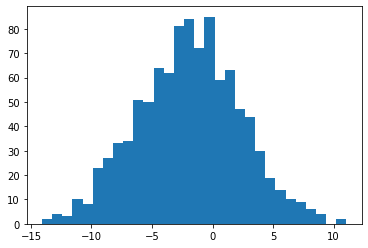

In [ ]:
plt.hist(model.predict(x), bins=30)

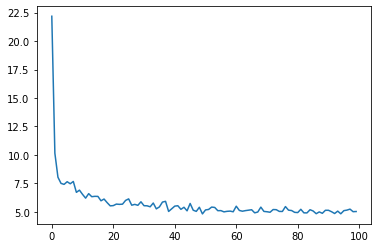

In [ ]:
plt.plot(history.history['loss'])

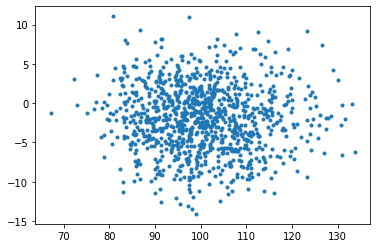

In [ ]:
plt.plot(S[:,-1], model.predict(x),marker='.', linestyle='none')
plt.show()

#### 유닛 수 바꾸기 3

In [ ]:
my_input = []
premium = tf.keras.layers.Input(shape=(1,), name="premium")
hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
price = tf.keras.layers.Input(shape=(1,), name="price")

my_input = my_input + [premium] + [hedge_cost] + [price]

for j in range(N):
    delta = tf.keras.layers.Dense(50, activation='tanh')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(50, activation='relu')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(50, activation='tanh')(delta)
    delta = tf.keras.layers.Dense(1)(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j+1))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="stock_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price_cumprod = tf.keras.layers.Multiply(name='price_cumprod'+str(j))([price, new_price])
    price = new_price
geom_mean = tf.keras.layers.Lambda(lambda x: tf.math.pow(x, 1/N, name='geom_mean'))(price_cumprod)
payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K,0), name='payoff')(geom_mean)
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

In [ ]:
premium = bscall(S0,K,T,r,sig) * np.ones([M,1])
cost = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [premium]+[cost]+[SS]
y = np.zeros([M,1])

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(x,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 74s 78ms/step - loss: 36.5985
Epoch 2/100
32/32 [==============================] - 2s 77ms/step - loss: 17.8431
Epoch 3/100
32/32 [==============================] - 2s 78ms/step - loss: 12.3551
Epoch 4/100
32/32 [==============================] - 2s 75ms/step - loss: 13.0723
Epoch 5/100
32/32 [==============================] - 2s 76ms/step - loss: 12.4604
Epoch 6/100
32/32 [==============================] - 2s 78ms/step - loss: 10.6914
Epoch 7/100
32/32 [==============================] - 3s 95ms/step - loss: 10.4287
Epoch 8/100
32/32 [==============================] - 2s 76ms/step - loss: 10.5364
Epoch 9/100
32/32 [==============================] - 2s 76ms/step - loss: 9.4457
Epoch 10/100
32/32 [==============================] - 2s 77ms/step - loss: 10.1222
Epoch 11/100
32/32 [==============================] - 2s 76ms/step - loss: 10.0717
Epoch 12/100
32/32 [==============================] - 2s 77ms/step - loss: 8.8135
Epoch 13/100
3

(array([ 3.,  2.,  5., 11.,  9., 25., 22., 27., 43., 53., 65., 88., 85.,
        97., 80., 69., 56., 54., 43., 56., 35., 17., 15., 14., 11.,  4.,
         3.,  4.,  3.,  1.]),
 array([-14.991775  , -14.081491  , -13.171209  , -12.260926  ,
        -11.350643  , -10.440361  ,  -9.530078  ,  -8.619796  ,
         -7.7095127 ,  -6.79923   ,  -5.888947  ,  -4.9786644 ,
         -4.068382  ,  -3.158099  ,  -2.2478163 ,  -1.3375335 ,
         -0.42725074,   0.48303202,   1.3933147 ,   2.3035975 ,
          3.2138803 ,   4.124163  ,   5.034446  ,   5.9447284 ,
          6.855011  ,   7.765294  ,   8.675576  ,   9.585859  ,
         10.496142  ,  11.4064245 ,  12.316708  ], dtype=float32),
 <a list of 30 Patch objects>)

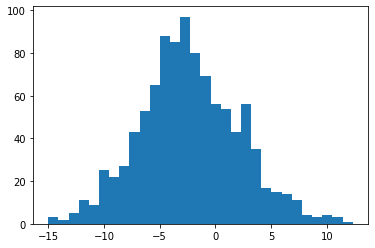

In [ ]:
plt.hist(model.predict(x), bins=30)

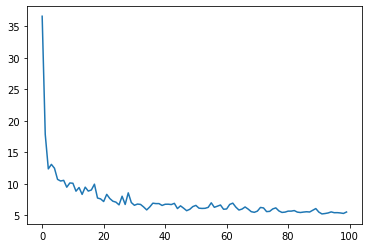

In [ ]:
plt.plot(history.history['loss'])

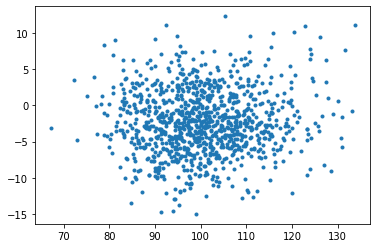

In [ ]:
plt.plot(S[:,-1], model.predict(x),marker='.', linestyle='none')
plt.show()

#### 유닛수 바꾸기 4

In [ ]:
my_input = []
premium = tf.keras.layers.Input(shape=(1,), name="premium")
hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
price = tf.keras.layers.Input(shape=(1,), name="price")

my_input = my_input + [premium] + [hedge_cost] + [price]

for j in range(N):
    delta = tf.keras.layers.Dense(100, activation='tanh')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(100, activation='relu')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(100, activation='tanh')(delta)
    delta = tf.keras.layers.Dense(1)(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j+1))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="stock_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price_cumprod = tf.keras.layers.Multiply(name='price_cumprod'+str(j))([price, new_price])
    price = new_price
geom_mean = tf.keras.layers.Lambda(lambda x: tf.math.pow(x, 1/N, name='geom_mean'))(price_cumprod)
payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K,0), name='payoff')(geom_mean)
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

In [ ]:
premium = bscall(S0,K,T,r,sig) * np.ones([M,1])
cost = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [premium]+[cost]+[SS]
y = np.zeros([M,1])

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(x,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 84s 191ms/step - loss: 93.9237
Epoch 2/100
32/32 [==============================] - 5s 170ms/step - loss: 58.1845
Epoch 3/100
32/32 [==============================] - 5s 161ms/step - loss: 44.4677
Epoch 4/100
32/32 [==============================] - 4s 117ms/step - loss: 33.8885
Epoch 5/100
32/32 [==============================] - 4s 118ms/step - loss: 31.9794
Epoch 6/100
32/32 [==============================] - 4s 120ms/step - loss: 31.1882
Epoch 7/100
32/32 [==============================] - 4s 120ms/step - loss: 24.1452
Epoch 8/100
32/32 [==============================] - 4s 119ms/step - loss: 23.1000
Epoch 9/100
32/32 [==============================] - 4s 121ms/step - loss: 24.1438
Epoch 10/100
32/32 [==============================] - 4s 120ms/step - loss: 22.0313
Epoch 11/100
32/32 [==============================] - 4s 120ms/step - loss: 18.9919
Epoch 12/100
32/32 [==============================] - 4s 125ms/step - loss: 15.8452


(array([ 1.,  0.,  1.,  0.,  5.,  5.,  7., 11., 23., 31., 42., 57., 61.,
        85., 82., 94., 91., 70., 78., 75., 46., 37., 35., 32., 13., 12.,
         3.,  1.,  0.,  2.]),
 array([-19.33797   , -18.270626  , -17.203281  , -16.135935  ,
        -15.06859   , -14.0012455 , -12.9339    , -11.866555  ,
        -10.79921   ,  -9.731865  ,  -8.664519  ,  -7.5971746 ,
         -6.5298295 ,  -5.4624844 ,  -4.395139  ,  -3.327794  ,
         -2.260449  ,  -1.1931039 ,  -0.12575874,   0.9415864 ,
          2.0089314 ,   3.0762765 ,   4.143622  ,   5.2109666 ,
          6.2783117 ,   7.345657  ,   8.413002  ,   9.480348  ,
         10.547692  ,  11.615038  ,  12.682383  ], dtype=float32),
 <a list of 30 Patch objects>)

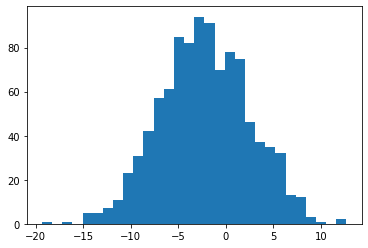

In [ ]:
plt.hist(model.predict(x), bins=30)

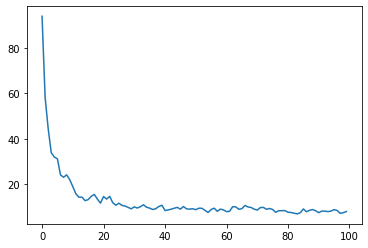

In [ ]:
plt.plot(history.history['loss'])

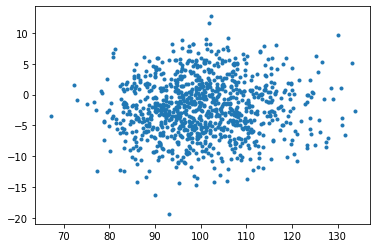

In [ ]:
plt.plot(S[:,-1], model.predict(x),marker='.', linestyle='none')
plt.show()

#### 시그모이드 function 적용

In [ ]:
my_input = []
premium = tf.keras.layers.Input(shape=(1,), name="premium")
hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
price = tf.keras.layers.Input(shape=(1,), name="price")

my_input = my_input + [premium] + [hedge_cost] + [price]

for j in range(N):
    delta = tf.keras.layers.Dense(20, activation='tanh')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(20, activation='tanh')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(20, activation='tanh')(delta)
    delta = tf.keras.layers.Dense(1, activation='sigmoid')(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j+1))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="stock_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price_cumprod = tf.keras.layers.Multiply(name='price_cumprod'+str(j))([price, new_price])
    price = new_price
geom_mean = tf.keras.layers.Lambda(lambda x: tf.math.pow(x, 1/N, name='geom_mean'))(price_cumprod)
payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K,0), name='payoff')(geom_mean)
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

In [ ]:
premium = bscall(S0,K,T,r,sig) * np.ones([M,1])
cost = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [premium]+[cost]+[SS]
y = np.zeros([M,1])

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(x,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 90s 60ms/step - loss: 34.7893
Epoch 2/100
32/32 [==============================] - 2s 61ms/step - loss: 27.9780
Epoch 3/100
32/32 [==============================] - 2s 60ms/step - loss: 23.7664
Epoch 4/100
32/32 [==============================] - 2s 60ms/step - loss: 20.3252
Epoch 5/100
32/32 [==============================] - 2s 59ms/step - loss: 17.3945
Epoch 6/100
32/32 [==============================] - 2s 58ms/step - loss: 15.3594
Epoch 7/100
32/32 [==============================] - 2s 61ms/step - loss: 13.3012
Epoch 8/100
32/32 [==============================] - 2s 60ms/step - loss: 11.6997
Epoch 9/100
32/32 [==============================] - 2s 60ms/step - loss: 10.7305
Epoch 10/100
32/32 [==============================] - 2s 59ms/step - loss: 9.8514
Epoch 11/100
32/32 [==============================] - 2s 60ms/step - loss: 9.1227
Epoch 12/100
32/32 [==============================] - 2s 59ms/step - loss: 8.4099
Epoch 13/100
32

(array([  2.,   1.,   1.,   4.,   2.,   9.,   9.,  19.,  22.,  33.,  45.,
         60.,  64.,  58., 101.,  84.,  73.,  80.,  61.,  75.,  56.,  41.,
         41.,  20.,  14.,  13.,   7.,   2.,   2.,   1.]),
 array([-11.679185  , -11.081473  , -10.483762  ,  -9.886051  ,
         -9.28834   ,  -8.690628  ,  -8.0929165 ,  -7.495205  ,
         -6.897494  ,  -6.2997823 ,  -5.7020707 ,  -5.1043596 ,
         -4.506648  ,  -3.9089367 ,  -3.3112252 ,  -2.7135139 ,
         -2.1158025 ,  -1.5180911 ,  -0.92037964,  -0.32266822,
          0.27504316,   0.8727546 ,   1.470466  ,   2.0681775 ,
          2.6658888 ,   3.2636    ,   3.8613117 ,   4.459023  ,
          5.0567346 ,   5.6544456 ,   6.252157  ], dtype=float32),
 <a list of 30 Patch objects>)

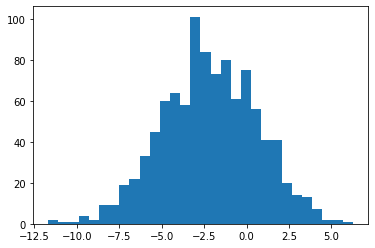

In [ ]:
plt.hist(model.predict(x), bins=30)

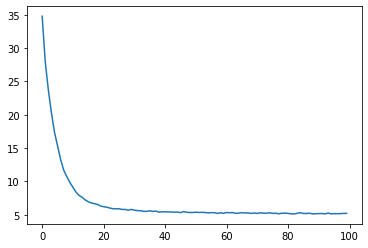

In [ ]:
plt.plot(history.history['loss'])

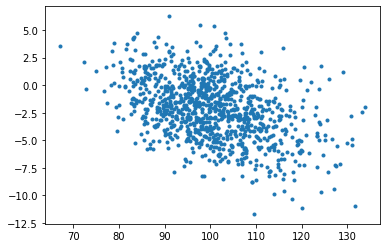

In [ ]:
plt.plot(S[:,-1], model.predict(x),marker='.', linestyle='none')
plt.show()

### 시그모이드 함수 적용 + leaky_relu 함수 적용

In [ ]:
my_input = []
premium = tf.keras.layers.Input(shape=(1,), name="premium")
hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
price = tf.keras.layers.Input(shape=(1,), name="price")

my_input = my_input + [premium] + [hedge_cost] + [price]

for j in range(N):
    delta = tf.keras.layers.Dense(20, activation='leaky_relu')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(20, activation='leaky_relu')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(20, activation='leaky_relu')(delta)
    delta = tf.keras.layers.Dense(1, activation='sigmoid')(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j+1))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="stock_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price_cumprod = tf.keras.layers.Multiply(name='price_cumprod'+str(j))([price, new_price])
    price = new_price
geom_mean = tf.keras.layers.Lambda(lambda x: tf.math.pow(x, 1/N, name='geom_mean'))(price_cumprod)
payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K,0), name='payoff')(geom_mean)
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

In [ ]:
premium = bscall(S0,K,T,r,sig) * np.ones([M,1])
cost = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [premium]+[cost]+[SS]
y = np.zeros([M,1])

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(x,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 98s 62ms/step - loss: 33.4075
Epoch 2/100
32/32 [==============================] - 3s 99ms/step - loss: 23.5061
Epoch 3/100
32/32 [==============================] - 3s 106ms/step - loss: 18.8400
Epoch 4/100
32/32 [==============================] - 3s 105ms/step - loss: 15.4402
Epoch 5/100
32/32 [==============================] - 4s 135ms/step - loss: 13.2856
Epoch 6/100
32/32 [==============================] - 4s 135ms/step - loss: 11.8029
Epoch 7/100
32/32 [==============================] - 3s 106ms/step - loss: 10.5097
Epoch 8/100
32/32 [==============================] - 3s 105ms/step - loss: 9.6842
Epoch 9/100
32/32 [==============================] - 3s 104ms/step - loss: 9.0384
Epoch 10/100
32/32 [==============================] - 3s 97ms/step - loss: 8.3398
Epoch 11/100
32/32 [==============================] - 3s 107ms/step - loss: 7.8413
Epoch 12/100
32/32 [==============================] - 3s 106ms/step - loss: 7.5280
Epoch 13

(array([  1.,   0.,   0.,   0.,   0.,   3.,   2.,   4.,  14.,  12.,  27.,
         37.,  48.,  72.,  97.,  89.,  97., 114., 106.,  82.,  56.,  59.,
         30.,  23.,  10.,   8.,   5.,   2.,   1.,   1.]),
 array([-1.2399390e+01, -1.1779932e+01, -1.1160473e+01, -1.0541015e+01,
        -9.9215565e+00, -9.3020973e+00, -8.6826391e+00, -8.0631809e+00,
        -7.4437222e+00, -6.8242640e+00, -6.2048054e+00, -5.5853467e+00,
        -4.9658885e+00, -4.3464298e+00, -3.7269714e+00, -3.1075130e+00,
        -2.4880545e+00, -1.8685960e+00, -1.2491375e+00, -6.2967902e-01,
        -1.0220528e-02,  6.0923797e-01,  1.2286965e+00,  1.8481549e+00,
         2.4676135e+00,  3.0870719e+00,  3.7065303e+00,  4.3259888e+00,
         4.9454474e+00,  5.5649056e+00,  6.1843643e+00], dtype=float32),
 <a list of 30 Patch objects>)

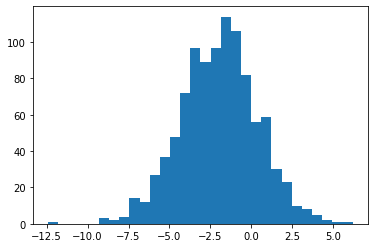

In [ ]:
plt.hist(model.predict(x), bins=30)

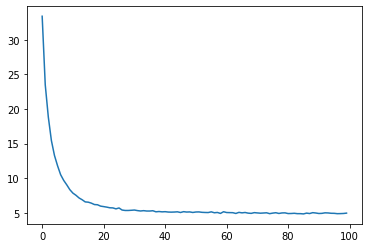

In [ ]:
plt.plot(history.history['loss'])

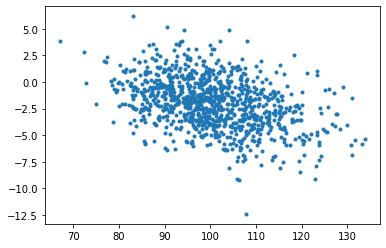

In [ ]:
plt.plot(S[:,-1], model.predict(x),marker='.', linestyle='none')
plt.show()

#### dropout1

In [ ]:
my_input = []
premium = tf.keras.layers.Input(shape=(1,), name="premium")
hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
price = tf.keras.layers.Input(shape=(1,), name="price")

my_input = my_input + [premium] + [hedge_cost] + [price]

for j in range(N):
    delta = tf.keras.layers.Dense(20, activation='tanh')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dropout(0.25)(delta)
    delta = tf.keras.layers.Dense(20, activation='relu')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dropout(0.25)(delta)
    delta = tf.keras.layers.Dense(20, activation='tanh')(delta)
    delta = tf.keras.layers.Dense(1)(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j+1))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="stock_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price_cumprod = tf.keras.layers.Multiply(name='price_cumprod'+str(j))([price, new_price])
    price = new_price
geom_mean = tf.keras.layers.Lambda(lambda x: tf.math.pow(x, 1/N, name='geom_mean'))(price_cumprod)
payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K,0), name='payoff')(geom_mean)
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

In [ ]:
premium = bscall(S0,K,T,r,sig) * np.ones([M,1])
cost = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [premium]+[cost]+[SS]
y = np.zeros([M,1])

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(x,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 81s 64ms/step - loss: 30.6753
Epoch 2/100
32/32 [==============================] - 2s 63ms/step - loss: 19.3968
Epoch 3/100
32/32 [==============================] - 2s 64ms/step - loss: 17.8056
Epoch 4/100
32/32 [==============================] - 2s 64ms/step - loss: 14.9481
Epoch 5/100
32/32 [==============================] - 2s 62ms/step - loss: 12.5620
Epoch 6/100
32/32 [==============================] - 2s 63ms/step - loss: 12.6240
Epoch 7/100
32/32 [==============================] - 2s 63ms/step - loss: 11.0811
Epoch 8/100
32/32 [==============================] - 2s 63ms/step - loss: 10.7637
Epoch 9/100
32/32 [==============================] - 2s 65ms/step - loss: 10.6100
Epoch 10/100
32/32 [==============================] - 2s 62ms/step - loss: 9.9332
Epoch 11/100
32/32 [==============================] - 2s 62ms/step - loss: 9.2337
Epoch 12/100
32/32 [==============================] - 2s 63ms/step - loss: 8.7317
Epoch 13/100
32

(array([ 2.,  3.,  5.,  6., 24., 28., 46., 38., 62., 75., 86., 79., 86.,
        87., 83., 66., 68., 43., 33., 35., 16., 14.,  7.,  4.,  1.,  0.,
         1.,  0.,  1.,  1.]),
 array([-6.838765  , -6.4675803 , -6.0963955 , -5.7252107 , -5.354026  ,
        -4.982841  , -4.611656  , -4.2404714 , -3.8692863 , -3.4981015 ,
        -3.1269166 , -2.7557318 , -2.3845468 , -2.013362  , -1.6421771 ,
        -1.2709923 , -0.8998074 , -0.52862257, -0.15743771,  0.21374716,
         0.584932  ,  0.95611686,  1.3273017 ,  1.6984866 ,  2.0696714 ,
         2.4408562 ,  2.812041  ,  3.183226  ,  3.554411  ,  3.9255958 ,
         4.2967806 ], dtype=float32),
 <a list of 30 Patch objects>)

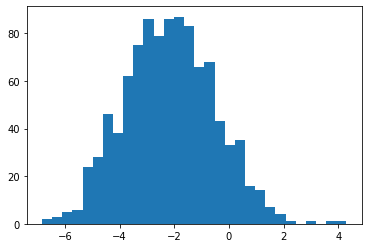

In [ ]:
plt.hist(model.predict(x), bins=30)

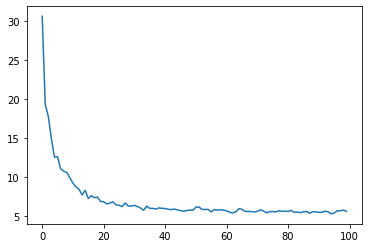

In [ ]:
plt.plot(history.history['loss'])

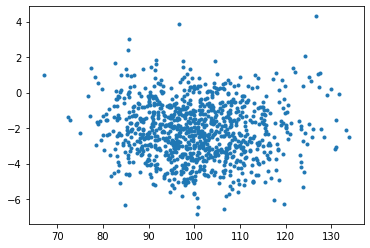

In [ ]:
plt.plot(S[:,-1], model.predict(x),marker='.', linestyle='none')
plt.show()

#### dropout2

In [ ]:
my_input = []
premium = tf.keras.layers.Input(shape=(1,), name="premium")
hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
price = tf.keras.layers.Input(shape=(1,), name="price")

my_input = my_input + [premium] + [hedge_cost] + [price]

for j in range(N):
    delta = tf.keras.layers.Dense(20, activation='leaky_relu')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dropout(0.1)(delta)
    delta = tf.keras.layers.Dense(20, activation='leaky_relu')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dropout(0.1)(delta)
    delta = tf.keras.layers.Dense(20, activation='leaky_relu')(delta)
    delta = tf.keras.layers.Dense(1, activation='sigmoid')(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j+1))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="stock_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price_cumprod = tf.keras.layers.Multiply(name='price_cumprod'+str(j))([price, new_price])
    price = new_price
geom_mean = tf.keras.layers.Lambda(lambda x: tf.math.pow(x, 1/N, name='geom_mean'))(price_cumprod)
payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K,0), name='payoff')(geom_mean)
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

In [ ]:
premium = bscall(S0,K,T,r,sig) * np.ones([M,1])
cost = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [premium]+[cost]+[SS]
y = np.zeros([M,1])

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(x,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 82s 65ms/step - loss: 35.9930
Epoch 2/100
32/32 [==============================] - 2s 65ms/step - loss: 29.1518
Epoch 3/100
32/32 [==============================] - 2s 65ms/step - loss: 24.6574
Epoch 4/100
32/32 [==============================] - 2s 64ms/step - loss: 21.9746
Epoch 5/100
32/32 [==============================] - 2s 63ms/step - loss: 18.3591
Epoch 6/100
32/32 [==============================] - 2s 64ms/step - loss: 17.4279
Epoch 7/100
32/32 [==============================] - 2s 66ms/step - loss: 14.5554
Epoch 8/100
32/32 [==============================] - 2s 66ms/step - loss: 13.7764
Epoch 9/100
32/32 [==============================] - 2s 64ms/step - loss: 12.5820
Epoch 10/100
32/32 [==============================] - 2s 64ms/step - loss: 10.9933
Epoch 11/100
32/32 [==============================] - 2s 65ms/step - loss: 10.8840
Epoch 12/100
32/32 [==============================] - 2s 64ms/step - loss: 10.1467
Epoch 13/100

(array([  1.,   0.,   2.,   2.,   5.,   3.,  10.,  11.,  17.,  24.,  48.,
         56.,  74.,  96., 134., 140., 107.,  90.,  84.,  36.,  22.,  18.,
         12.,   5.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([-6.5828056 , -6.280105  , -5.977405  , -5.6747046 , -5.372004  ,
        -5.0693035 , -4.7666035 , -4.463903  , -4.1612024 , -3.8585021 ,
        -3.5558019 , -3.2531013 , -2.950401  , -2.6477005 , -2.3450003 ,
        -2.0422997 , -1.7395995 , -1.4368991 , -1.1341987 , -0.8314983 ,
        -0.5287979 , -0.22609755,  0.07660282,  0.37930322,  0.6820036 ,
         0.98470396,  1.2874044 ,  1.5901047 ,  1.8928051 ,  2.1955056 ,
         2.498206  ], dtype=float32),
 <a list of 30 Patch objects>)

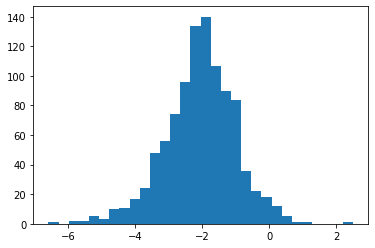

In [ ]:
plt.hist(model.predict(x), bins=30)

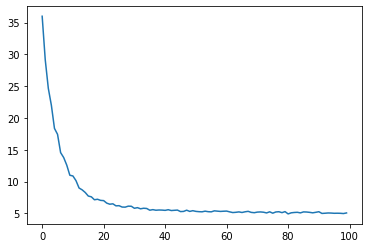

In [ ]:
plt.plot(history.history['loss'])

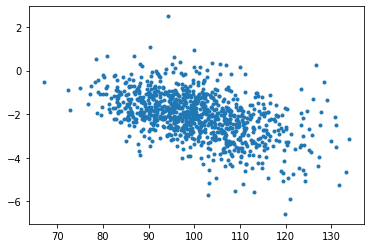

In [ ]:
plt.plot(S[:,-1], model.predict(x),marker='.', linestyle='none')
plt.show()

#### Optimizer 바꿔보기

In [ ]:
my_input = []
premium = tf.keras.layers.Input(shape=(1,), name="premium")
hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
price = tf.keras.layers.Input(shape=(1,), name="price")

my_input = my_input + [premium] + [hedge_cost] + [price]

for j in range(N):
    delta = tf.keras.layers.Dense(20, activation='tanh')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(20, activation='relu')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(20, activation='tanh')(delta)
    delta = tf.keras.layers.Dense(1)(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j+1))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="stock_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price_cumprod = tf.keras.layers.Multiply(name='price_cumprod'+str(j))([price, new_price])
    price = new_price
geom_mean = tf.keras.layers.Lambda(lambda x: tf.math.pow(x, 1/N, name='geom_mean'))(price_cumprod)
payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K,0), name='payoff')(geom_mean)
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

In [ ]:
premium = bscall(S0,K,T,r,sig) * np.ones([M,1])
cost = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [premium]+[cost]+[SS]
y = np.zeros([M,1])

In [ ]:
model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
history = model.fit(x,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 117s 69ms/step - loss: 16.7338
Epoch 2/100
32/32 [==============================] - 2s 69ms/step - loss: 7.7014
Epoch 3/100
32/32 [==============================] - 2s 70ms/step - loss: 7.2526
Epoch 4/100
32/32 [==============================] - 2s 67ms/step - loss: 6.8119
Epoch 5/100
32/32 [==============================] - 2s 67ms/step - loss: 6.6465
Epoch 6/100
32/32 [==============================] - 2s 68ms/step - loss: 7.0236
Epoch 7/100
32/32 [==============================] - 2s 66ms/step - loss: 6.6429
Epoch 8/100
32/32 [==============================] - 2s 66ms/step - loss: 6.6769
Epoch 9/100
32/32 [==============================] - 2s 66ms/step - loss: 6.2434
Epoch 10/100
32/32 [==============================] - 2s 66ms/step - loss: 6.3927
Epoch 11/100
32/32 [==============================] - 2s 67ms/step - loss: 6.1207
Epoch 12/100
32/32 [==============================] - 2s 66ms/step - loss: 6.0515
Epoch 13/100
32/32 [==

(array([  1.,   0.,   0.,   0.,   1.,   3.,   5.,  14.,  17.,  30.,  48.,
         66.,  66.,  85.,  87., 102., 120.,  83.,  70.,  70.,  46.,  31.,
         20.,  11.,  11.,   8.,   3.,   0.,   1.,   1.]),
 array([-20.81003  , -19.617304 , -18.424578 , -17.23185  , -16.039124 ,
        -14.846397 , -13.653671 , -12.460944 , -11.268218 , -10.075491 ,
         -8.882765 ,  -7.690038 ,  -6.4973116,  -5.3045855,  -4.111859 ,
         -2.9191322,  -1.7264057,  -0.5336792,   0.6590473,   1.8517739,
          3.0445004,   4.237227 ,   5.4299536,   6.6226797,   7.8154063,
          9.008133 ,  10.200859 ,  11.393586 ,  12.586312 ,  13.779039 ,
         14.9717655], dtype=float32),
 <a list of 30 Patch objects>)

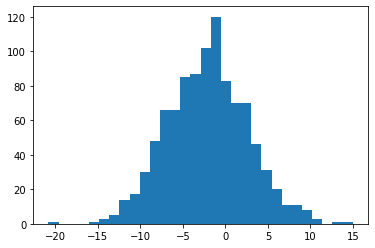

In [ ]:
plt.hist(model.predict(x), bins=30)

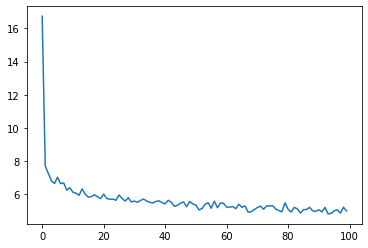

In [ ]:
plt.plot(history.history['loss'])

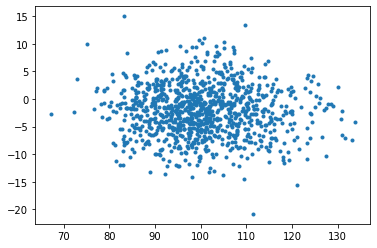

In [ ]:
plt.plot(S[:,-1], model.predict(x),marker='.', linestyle='none')
plt.show()

#### SGD

In [ ]:
my_input = []
premium = tf.keras.layers.Input(shape=(1,), name="premium")
hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
price = tf.keras.layers.Input(shape=(1,), name="price")

my_input = my_input + [premium] + [hedge_cost] + [price]

for j in range(N):
    delta = tf.keras.layers.Dense(20, activation='tanh')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(20, activation='relu')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(20, activation='tanh')(delta)
    delta = tf.keras.layers.Dense(1)(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j+1))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="stock_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price_cumprod = tf.keras.layers.Multiply(name='price_cumprod'+str(j))([price, new_price])
    price = new_price
geom_mean = tf.keras.layers.Lambda(lambda x: tf.math.pow(x, 1/N, name='geom_mean'))(price_cumprod)
payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K,0), name='payoff')(geom_mean)
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

In [ ]:
premium = bscall(S0,K,T,r,sig) * np.ones([M,1])
cost = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [premium]+[cost]+[SS]
y = np.zeros([M,1])

In [ ]:
model.compile(loss='mse', optimizer='SGD')

In [ ]:
history = model.fit(x,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 67s 45ms/step - loss: 8.2521
Epoch 2/100
32/32 [==============================] - 1s 46ms/step - loss: 6.8570
Epoch 3/100
32/32 [==============================] - 1s 44ms/step - loss: 6.8480
Epoch 4/100
32/32 [==============================] - 1s 44ms/step - loss: 6.8660
Epoch 5/100
32/32 [==============================] - 1s 43ms/step - loss: 6.8753
Epoch 6/100
32/32 [==============================] - 1s 44ms/step - loss: 6.7066
Epoch 7/100
32/32 [==============================] - 1s 44ms/step - loss: 6.9716
Epoch 8/100
32/32 [==============================] - 1s 43ms/step - loss: 6.7689
Epoch 9/100
32/32 [==============================] - 1s 44ms/step - loss: 6.9057
Epoch 10/100
32/32 [==============================] - 1s 42ms/step - loss: 6.7356
Epoch 11/100
32/32 [==============================] - 1s 44ms/step - loss: 6.8977
Epoch 12/100
32/32 [==============================] - 1s 43ms/step - loss: 6.8510
Epoch 13/100
32/32 [====

(array([ 3.,  3.,  3.,  8., 14., 18., 29., 26., 43., 72., 61., 88., 86.,
        77., 80., 66., 77., 66., 38., 42., 33., 20., 19., 12.,  5.,  7.,
         1.,  1.,  0.,  2.]),
 array([-4.994105  , -4.790495  , -4.586885  , -4.383275  , -4.179665  ,
        -3.9760551 , -3.7724452 , -3.5688353 , -3.3652253 , -3.1616154 ,
        -2.9580054 , -2.7543955 , -2.5507855 , -2.3471756 , -2.1435657 ,
        -1.9399556 , -1.7363456 , -1.5327357 , -1.3291258 , -1.1255158 ,
        -0.9219058 , -0.7182959 , -0.5146859 , -0.311076  , -0.10746603,
         0.09614392,  0.29975387,  0.50336385,  0.7069738 ,  0.91058373,
         1.1141937 ], dtype=float32),
 <a list of 30 Patch objects>)

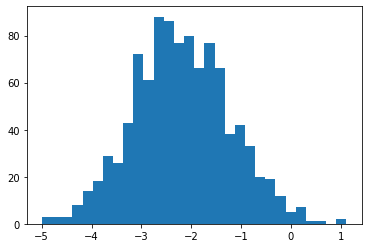

In [ ]:
plt.hist(model.predict(x), bins=30)

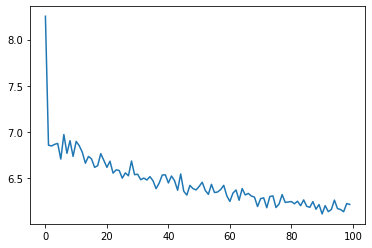

In [ ]:
plt.plot(history.history['loss'])

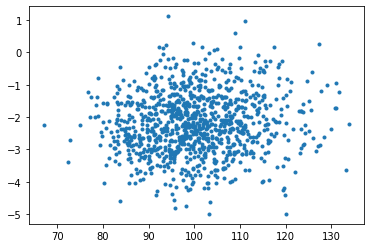

In [ ]:
plt.plot(S[:,-1], model.predict(x),marker='.', linestyle='none')
plt.show()